In [ ]:
pip install catboost


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error

## 1. Reading Processed Data

In [ ]:
processed_df = pd.read_csv('pp.csv')

In [ ]:
processed_df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2.0,3,2.0,3,3.0,2.0,5.0,2.0,31397,7.0,0.0,0,2,5,4911.0,0
1,2,2,2.0,5,2.0,2,3.0,3.0,5.0,2.0,31397,7.0,1.0,0,2,5,5954.0,4
2,3,10,4.0,1,0.0,2,1.0,3.0,4.0,2.0,31397,7.0,1.0,0,2,5,4745.0,3
3,4,26,1.0,2,1.0,2,3.0,2.0,3.0,2.0,31397,7.0,1.0,0,2,5,7272.0,4
4,5,26,1.0,2,1.0,2,3.0,3.0,3.0,2.0,31397,7.0,1.0,0,2,5,5558.0,4


## 2. Feature Selection

> 2.1 Feature Selection after analysing heatmap (already done)

> 2.2 Feature Selection with Chi-2 test

> 2.3 Feature Selection with 'feature-importantance' Property of model

### 2.2 Feature Selection with Chi-2 test

In [ ]:
# remove two irrelevent features during feature selection
desc_features = []

for i in range(len(processed_df.columns)):
    desc_features.append(str(processed_df.columns[i]))
    
desc_features.remove('case_id')
desc_features.remove('Stay')

desc_features

['Hospital_code',
 'Hospital_type_code',
 'City_Code_Hospital',
 'Hospital_region_code',
 'Available Extra Rooms in Hospital',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Bed Grade',
 'patientid',
 'City_Code_Patient',
 'Type of Admission',
 'Severity of Illness',
 'Visitors with Patient',
 'Age',
 'Admission_Deposit']

In [ ]:
# split the data for feature selection
X_train, X_test, y_train, y_test = train_test_split(processed_df[desc_features], processed_df['Stay'], test_size=0.33, random_state=42)

In [ ]:
processed_df['Stay']

0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 318438, dtype: int64

In [ ]:
# feature selection using chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 2221.935823
Feature 1: 2093.017078
Feature 2: 1441.469777
Feature 3: 328.308914
Feature 4: 2000.771645
Feature 5: 67.272011
Feature 6: 3881.198780
Feature 7: 410.042383
Feature 8: 851.328880
Feature 9: 266140.484528
Feature 10: 825.181617
Feature 11: 1332.804802
Feature 12: 112.274915
Feature 13: 67906.169055
Feature 14: 1744.341649
Feature 15: 770960.081487


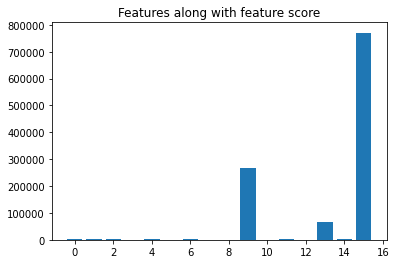

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title('Features along with feature score')
plt.show()

In [ ]:
# select the features with maximum scores
print(desc_features[15])
print(desc_features[9])
print(desc_features[13])

Admission_Deposit
patientid
Visitors with Patient


### 2.3 Feature Selection with 'feature-importantance' Property of model

[0.02832884 0.00990709 0.01055808 0.0045827  0.07689925 0.0443189
 0.03077765 0.00769793 0.03903901 0.17827168 0.11480784 0.02463893
 0.02425789 0.11166249 0.10838671 0.185865  ]


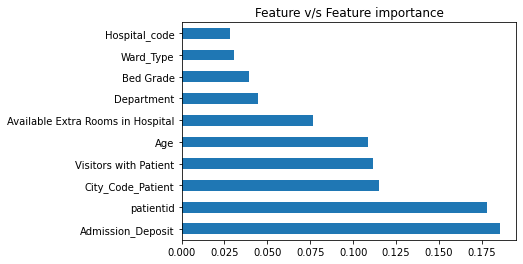

In [ ]:
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=desc_features)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature v/s Feature importance')
plt.show()

In [ ]:
processed_df['Stay']

0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 318438, dtype: int64

## 3. Modelling

> 3.1 Decision Tree Classifier

> 3.2 Linear Regression For Multiclass classification

> 3.3 Naive Bayes For Multiclass classification

> 3.4 CatBoost

we will use top 4 features for modelling - Admission_Deposit, patientid, Visitors with Patient, City_Code_Patient

In [ ]:
# we will split the data again based on these 3 features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(processed_df[["Admission_Deposit", "patientid", "Visitors with Patient", "City_Code_Patient"]], processed_df['Stay'], test_size=0.33, random_state=42)

### 3.1 Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# instance through constructor
dt_clf = DecisionTreeClassifier(max_depth = 10, criterion='entropy', random_state = 56)
# # we will train the decision tree model based on splitted train data
dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)
print(len(dt_y_pred))
mean_squared_error(y_test,dt_y_pred)

105085


3.7391349859637435

In [ ]:
dt_clf.feature_importances_

array([0.11909077, 0.06321998, 0.76534972, 0.05233952])

### 3.2 Naive Bayes

In [ ]:
# create instance of naive bayes guassianNB
gnb_classifier = GaussianNB()
# train the model
nb_y_pred = gnb_classifier.fit(X_train, y_train).predict(X_test)
mean_squared_error(y_test,nb_y_pred)

3.8981015368511205

### 3.3.1 CatBoost on selected features

In [ ]:
!conda install catboost

/bin/bash: conda: command not found


In [ ]:
model_1 = CatBoostClassifier(iterations=750,
                           learning_rate=0.08,
                           depth=7,
                           loss_function='MultiClass',
                           eval_metric='Accuracy')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(processed_df[["Admission_Deposit", "patientid", "Visitors with Patient", "City_Code_Patient"]], processed_df['Stay'], test_size=0.33, random_state=42)

In [ ]:
model_1.fit(X_train, y_train)

0:	learn: 0.3173004	total: 405ms	remaining: 5m 3s
1:	learn: 0.3181535	total: 704ms	remaining: 4m 23s
2:	learn: 0.3184206	total: 993ms	remaining: 4m 7s
3:	learn: 0.3194799	total: 1.28s	remaining: 3m 59s
4:	learn: 0.3191800	total: 1.57s	remaining: 3m 53s
5:	learn: 0.3190956	total: 1.82s	remaining: 3m 46s
6:	learn: 0.3195971	total: 2.1s	remaining: 3m 43s
7:	learn: 0.3196627	total: 2.38s	remaining: 3m 41s
8:	learn: 0.3198455	total: 2.67s	remaining: 3m 39s
9:	learn: 0.3198315	total: 2.95s	remaining: 3m 38s
10:	learn: 0.3198736	total: 3.23s	remaining: 3m 36s
11:	learn: 0.3197565	total: 3.5s	remaining: 3m 35s
12:	learn: 0.3202955	total: 3.8s	remaining: 3m 35s
13:	learn: 0.3200799	total: 4.07s	remaining: 3m 34s
14:	learn: 0.3202017	total: 4.34s	remaining: 3m 32s
15:	learn: 0.3213454	total: 4.62s	remaining: 3m 31s
16:	learn: 0.3213360	total: 4.91s	remaining: 3m 31s
17:	learn: 0.3216172	total: 5.19s	remaining: 3m 31s
18:	learn: 0.3217157	total: 5.47s	remaining: 3m 30s
19:	learn: 0.3218188	total:

In [ ]:
catboost_y_pred_1 = model_1.predict(X_test)
mean_squared_error(y_test,catboost_y_pred_1)

3.7433982014559644

### 3.3.2 CatBoost on all available features

In [ ]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(processed_df[desc_features], processed_df['Stay'], test_size=0.33, random_state=42)

In [ ]:
model = CatBoostClassifier(iterations=750,
                           learning_rate=0.08,
                           depth=7,
                           loss_function='MultiClass',
                           eval_metric='Accuracy')

In [ ]:
model.fit(X_train_f, y_train_f)

0:	learn: 0.3790151	total: 661ms	remaining: 8m 15s
1:	learn: 0.3847333	total: 1.33s	remaining: 8m 17s
2:	learn: 0.3885439	total: 2.01s	remaining: 8m 20s
3:	learn: 0.3906390	total: 2.67s	remaining: 8m 17s
4:	learn: 0.3929919	total: 3.32s	remaining: 8m 14s
5:	learn: 0.3926591	total: 3.98s	remaining: 8m 13s
6:	learn: 0.3931841	total: 4.62s	remaining: 8m 10s
7:	learn: 0.3939574	total: 5.28s	remaining: 8m 9s
8:	learn: 0.3941777	total: 5.94s	remaining: 8m 9s
9:	learn: 0.3944871	total: 6.59s	remaining: 8m 7s
10:	learn: 0.3945949	total: 7.25s	remaining: 8m 6s
11:	learn: 0.3952651	total: 7.93s	remaining: 8m 7s
12:	learn: 0.3955557	total: 8.58s	remaining: 8m 6s
13:	learn: 0.3956307	total: 9.24s	remaining: 8m 5s
14:	learn: 0.3958323	total: 9.89s	remaining: 8m 4s
15:	learn: 0.3965728	total: 10.6s	remaining: 8m 4s
16:	learn: 0.3977868	total: 11.2s	remaining: 8m 3s
17:	learn: 0.3978477	total: 11.9s	remaining: 8m 2s
18:	learn: 0.3993429	total: 12.5s	remaining: 8m 1s
19:	learn: 0.4010255	total: 13.2s	

In [ ]:
eval_pred = model.predict(X_test_f)
mean_squared_error(y_test_f,eval_pred)

2.904077651425037

## 4. Evaluation

> 1. Evaluation for Decision Tree Classifer

> 2. Evaluation for Linear Regression for multiclass classification

> 3. Evaluation for Naive Bayes

### 4.1 Evaluation for Decision Tree Classifer

In [ ]:
# accuracy
accuracy = accuracy_score(y_test, dt_y_pred)
print("accuracy: ",accuracy)
print("error rate: ", round(1-accuracy, 2)) # round of to two digits after decimal

accuracy:  0.3194937431602988
error rate:  0.68


In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, dt_y_pred)
cm_df = pd.DataFrame(cm)

# print result
print("confusion matrix for decision tree")
print("==================================")
print(cm_df)

confusion matrix for decision tree
     0     1      2     3   4     5   6   7   8   9    10
0   487  1943   4461   803  18   133   1   3   0   2    0
1   337  4620  16214  3554  14   935   2   7   0   2   10
2   396  4568  19954  3212  13   815   1   7   2   1   25
3   233  2135   8730  4313  13  2586   3  20   5   5   70
4   116   556   2270   611   5   247   1   3   0   4   33
5   124   928   3288  3568  12  3511   3  31  38   9  149
6    27   106    457   155   2   129   0   5   2   0   26
7    36   242    859   990   2  1005   0  32  16   2  157
8    13    65    131   196   1  1019   2  14  39   1  113
9    11    58    251   237   1   220   1  13   7   0  102
10   31    72    253   215   3   930   0  48  15   0  613


### 4.2 Evaluation for Naive Bayes

In [ ]:
# accuracy
accuracy = accuracy_score(y_test, nb_y_pred)
print("accuracy: ",accuracy)
print("error rate: ", round(1-accuracy, 2)) # round of to two digits after decimal

accuracy:  0.30846457629537993
error rate:  0.69


In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, nb_y_pred)
cm_df = pd.DataFrame(cm)

# print result
print("confusion matrix for naive bayes")
print("================================")
print(cm_df)

confusion matrix for naive bayes
    0     1      2     3   4     5   6   7   8   9    10
0   74   937   6617   175   0    48   0   0   0   0    0
1   90  2301  22304   480   0   510   0   0   0   0   10
2   77  2255  25801   378   0   427   0   0   0   0   56
3   35  1642  13554  1123   0  1678   0   0   0   0   81
4   18   375   3092   157   0   165   0   0   0   0   39
5   16   963   6629  1398   0  2450   0   0   1   0  204
6    2    72    623    63   0   118   0   0   1   0   30
7    3   254   1778   396   0   721   0   0   0   0  189
8    0    34    279   249   0   887   0   0   0   0  145
9    3    64    467    93   0   144   0   0   0   0  130
10   2    62    445   199   0   805   0   0   1   0  666


### 4.3 Evaluation for CatBoost on selected features

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, catboost_y_pred_1)
cm_df = pd.DataFrame(cm)

# print result
print("confusion matrix for catboost")
print("=============================")
print(cm_df)

confusion matrix for catboost
     0     1      2     3   4     5   6   7   8   9    10
0   536  1902   4583   744   2    84   0   0   0   0    0
1   349  4627  16415  3471   0   807   1   5   2   0   18
2   376  4235  20421  3178   1   742   0   2   5   0   34
3   227  2221   8836  4334   1  2345   0  13   5   1  130
4   116   533   2334   589   0   224   0   4   0   2   44
5   102  1099   3188  3628   1  3330   0  29  36   2  246
6    30    99    462   147   0   131   1   3   3   0   33
7    25   298    802  1009   1   946   0  21  14   6  219
8    16    54    144   204   0   978   0   7  30   0  161
9     9    63    244   229   0   224   0   9   7   1  115
10   36    81    248   229   0   807   0  20  14   3  742


In [ ]:
# accuracy
print(model_1.get_best_score())

{'learn': {'Accuracy': 0.3502411496440172, 'MultiClass': 1.6581544124797638}}


In [ ]:
print("Accuracy: {}%".format(model_1.get_best_score()['learn']['Accuracy']*100))

Accuracy: 35.02411496440172%


### 4.4 Evaluation on CatBoost on all features

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test_f, eval_pred)
cm_df = pd.DataFrame(cm)

# print result
print("confusion matrix for catboost")
print("=============================")
print(cm_df)

confusion matrix for catboost
      0      1      2     3   4     5   6   7    8   9    10
0   1271   3786   2705    51   6    28   0   2    0   0    2
1    695  13030   9998  1216   9   737   0   3    4   0    3
2    582   8385  19077   437   8   427   1   5   39   0   33
3    308   3144   7461  4201  12  2864   1  24   29   3   66
4    136    732   2382   268  11   266   0   2   10   1   38
5    130    909   1646  2921   5  5594   1  44  237   4  170
6     27    113    473    78   6   165   1   8    4   0   34
7     36    201    366   676   2  1693   0  76   52   4  235
8     24     57     73   151   1   798   0  11  282   0  197
9     10     36    103   141   3   444   0  20   13  10  121
10    32     90    119   140   3   639   1  55  153   8  940


In [ ]:
model.get_best_score()

{'learn': {'Accuracy': 0.46821933602995974, 'MultiClass': 1.3888718258221575}}

In [ ]:
print("Accuracy: {}%".format(model.get_best_score()['learn']['Accuracy']*100))

Accuracy: 46.821933602995976%
